# Weather Forecasting 

For this project I am using a dataset that I got off of kaggle that contains that weather history and data of London. I tried looking for data for Pakistan and its cities but there was no usable dataset hence I am using this comprehensive dataset off of Kaggle. 

Dataset Link: https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data

This project uses a Neural Prohet model which was built by facebook for time-series forecasting.

## 1. Importing the necessary libraries 


In [19]:
pip install neuralprophet


  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Using cached plotly_resampler-0.8.3.2-cp39-cp39-win_amd64.whl
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached hijri_converter-2.3.1-py3-none-any.whl (13 kB)
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached lightning_utilities-0.9.0-py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import pickle

C:\Users\Shahbaz\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Loading the dataset and preprocessing

In [22]:
df = pd.read_csv("london_weather.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [23]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [25]:
df.dtypes

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

As we can see the date column needs to be changed to the correct format.

In [28]:
from datetime import datetime
df["date"] = df["date"].astype(str)
df["date"] = df["date"].apply(lambda x: datetime.strptime(x, "%Y%m%d").strftime("%Y-%m-%d"))
df.head()


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [29]:
df.dtypes

date                 object
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

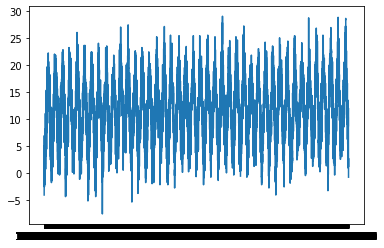

In [35]:
plt.plot(df["date"],df["mean_temp"])
plt.show()

This shows that the data is consistent.

Now for simplicity purposes we will use a dataframe that has only 2 columns: Date and mean temp, and we will use these to train the neuralprophet model.

In [40]:
selected_col = ["date", "mean_temp"]
london = df[selected_col]
london.dropna(inplace = True)
london.columns = ['ds', 'y']
london.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_7376\79334378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london.dropna(inplace = True)



,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8


## 3. Training the model

In [41]:
model = NeuralProphet()
model.fit(london, freq = 'D', epochs = 1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.758% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (240) is too small than the required number for the learning rate finder (254). The results might not be optimal.
Missing logger folder: C:\Users\Shahbaz\Desktop\Internship\Project\lightning_logs


Finding best initial lr:   0%|          | 0/254 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,40.485313,49.036011,0.729035,0.0,0
1,35.243137,42.841656,0.594326,0.0,1
2,30.306469,36.958473,0.471688,0.0,2
3,25.931789,31.777514,0.366544,0.0,3
4,22.108648,27.208517,0.279938,0.0,4
...,...,...,...,...,...
995,2.286697,2.836350,0.003813,0.0,995
996,2.287541,2.836037,0.003815,0.0,996
997,2.292409,2.839168,0.003825,0.0,997
998,2.289882,2.839179,0.003821,0.0,998


Now that the model is trained, we can make a future dataframe and use it for getting predictions.

## 4. Making Predictions

In [49]:
future = model.make_future_dataframe(london, periods = 940)
forecast = model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.758% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.894% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.894% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 240it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,6.727909,12.694744,-5.983416,0.016581
1,2021-01-02,None,6.684412,12.695086,-5.995822,-0.014852
2,2021-01-03,None,6.678673,12.695427,-6.008733,-0.008020
3,2021-01-04,None,6.639805,12.695766,-6.022218,-0.033744
4,2021-01-05,None,6.627827,12.696108,-6.036332,-0.031951


In [51]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
935,2023-07-25,None,20.732605,13.013893,7.750665,-0.031951
936,2023-07-26,None,20.823143,13.014235,7.765635,0.043274
937,2023-07-27,None,20.819519,13.014574,7.776233,0.028713
938,2023-07-28,None,20.813915,13.014915,7.782419,0.016581
939,2023-07-29,None,20.784571,13.015257,7.784166,-0.014852


Based on these finding we can check for todays date temperature on google and use these predictions that we got to see how accurate it is: 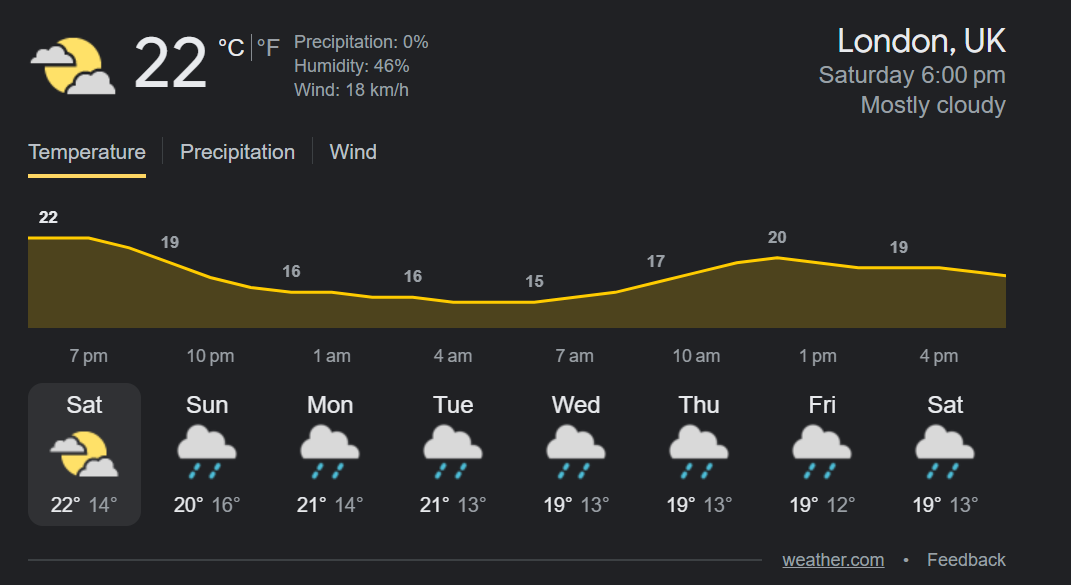

The predicted mean temperature is 20.78 and as we can see from the image,  and what we got off of google is within the range of MAE=2.290.

Hence our model is working as intended and making accurate predictions.


## 5. Saving the model

In [53]:
with open('pred_model.pkl', "wb") as f:
    pickle.dump(model, f)